In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [67]:
df = pd.read_csv("hyundai.csv")

In [68]:
display(df)

,model,year,price,transmission,mileage,fuelType,mpg,engineSize
0,I20,2017,7999,Manual,17307,Petrol,58.9,1.2
1,Tucson,2016,14499,Automatic,25233,Diesel,43.5,2.0
2,Tucson,2016,11399,Manual,37877,Diesel,61.7,1.7
3,I10,2016,6499,Manual,23789,Petrol,60.1,1.0
4,IX35,2015,10199,Manual,33177,Diesel,51.4,2.0
...,...,...,...,...,...,...,...,...
4855,I30,2016,8680,Manual,25906,Diesel,78.4,1.6
4856,I40,2015,7830,Manual,59508,Diesel,65.7,1.7
4857,I10,2017,6830,Manual,13810,Petrol,60.1,1.0
4858,Tucson,2018,13994,Manual,23313,Petrol,44.8,1.6


In [69]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4860 entries, 0 to 4859
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         4860 non-null   object 
 1   year          4860 non-null   int64  
 2   price         4860 non-null   int64  
 3   transmission  4860 non-null   object 
 4   mileage       4860 non-null   int64  
 5   fuelType      4860 non-null   object 
 6   mpg           4860 non-null   float64
 7   engineSize    4860 non-null   float64
dtypes: float64(2), int64(3), object(3)
memory usage: 303.9+ KB


None

In [70]:
def unique_column_count(df, col): 
    
    col_count = df[col].value_counts(normalize = True)
    col_count = pd.DataFrame(col_count)
    col_count = col_count.reset_index()
    col_count = col_count.rename(columns = {"index" : col, col : "% of cars"})
    col_count ["% of cars"] = col_count["% of cars"]*100
    col_count ["% of cars"] = col_count["% of cars"].round(2)

    return col_count

In [71]:
fuelType_count = unique_column_count(df, "fuelType")
display(fuelType_count)

transmission_count = unique_column_count(df, "transmission")
display(transmission_count)

model_count = unique_column_count(df, "model")
display(model_count)

year_count = unique_column_count(df, "year")
year_count = year_count.sort_values(by = "year")
display(year_count.tail())

,fuelType,% of cars
0,Petrol,59.71
1,Diesel,33.09
2,Hybrid,7.18
3,Other,0.02


,transmission,% of cars
0,Manual,74.30
1,Automatic,13.77
2,Semi-Auto,11.89
3,Other,0.04


,model,% of cars
0,Tucson,26.75
1,I10,22.47
2,I30,11.03
3,I20,10.21
4,Kona,6.75
5,Ioniq,5.84
6,Santa Fe,5.04
7,IX20,4.20
8,I40,2.61
9,IX35,2.43


,year,% of cars
3,2016,14.73
0,2017,24.24
2,2018,20.31
1,2019,22.35
6,2020,3.27


In [72]:
 def barplot(data, x_col ,y_col ,color ,yticks, rotation):
    sns.barplot(x =  x_col , y = y_col , data = data, color = color)
    plt.title("Percentage of hyundai cars by " + x_col)
    plt.yticks(yticks)
    plt.xticks(rotation = rotation)

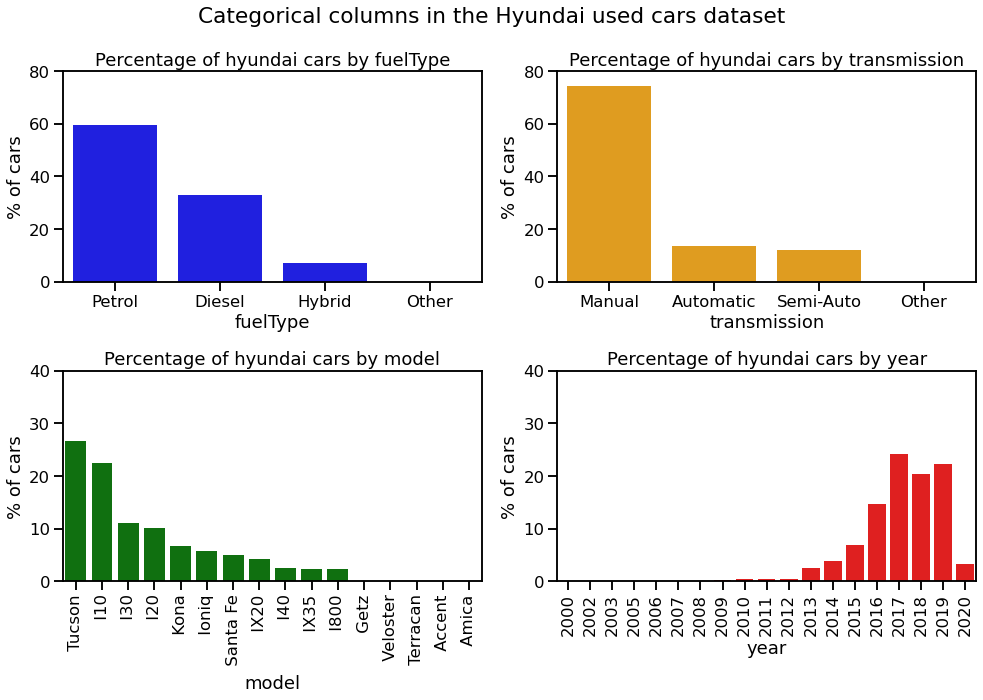

In [75]:
plt.figure(figsize = (14,10))
sns.set_context("talk")

plt.subplot(2,2,1)
barplot(fuelType_count, "fuelType" ,"% of cars" ,"blue" ,np.arange(0,81,20), 0)

plt.subplot(2,2,2)
barplot(transmission_count, "transmission" ,"% of cars" ,"orange" ,np.arange(0,81,20), 0)

plt.subplot(2,2,3)
barplot(model_count, "model" ,"% of cars" ,"green" ,np.arange(0,41,10), 90)

plt.subplot(2,2,4)
barplot(year_count, "year" ,"% of cars" ,"red" ,np.arange(0,41,10), 90)

plt.suptitle("Categorical columns in the Hyundai used cars dataset")

plt.tight_layout()
plt.show()